## EDA of Pareto results from the Susquehanna model

In [17]:
import sys
import os
import pandas as pd
from ema_workbench.analysis.parcoords import ParallelAxes, get_limits
from ema_workbench.em_framework.optimization import HypervolumeMetric
import seaborn as sns
import matplotlib.pyplot as plt
plt.rcParams['figure.figsize'] = [12, 5]
sys.path.append('..')
from itertools import chain
import numpy as np

from platypus import Solution, Problem, Hypervolume


import problem_formulation_original

## Loading datasets for USGS Data

In [3]:
## cleaning the mess of gathered data for the hydropower of Conowingo

# Based on data with time step of 15 minutes, year 1999

df = pd.read_csv(f"../data1999/turbines_flow_usgs_gov_1999.txt", sep="\t", header=None)
df = df.drop(columns = [0,1,3,5], axis=0)
df = df.rename(columns= {2: "Date Time", 4: "Release (cfs)"})
df = df[df['Date Time'].str.contains('1999')]
df['Date Time'] = pd.to_datetime(df['Date Time'])
df = df.set_index("Date Time")

# Based on data with time step of 1 day, year 1999

df_day = pd.read_csv(f"../data1999/turbines_flow_usgs_gov_1999_second_source.txt", sep="\t", header=None)
df_day = df_day.drop(columns = [0,1,4], axis=0)
df_day = df_day.rename(columns= {2: "Date Time", 3: "Release (cfs)"})
df_day['Date Time'] = pd.to_datetime(df_day['Date Time'])
df_day = df_day.set_index("Date Time")

# Based on data with time step of 1 month, year 1999

df_month = pd.read_csv(f"../data1999/monthly_hydropower_cfs.txt", sep="\t", header=None)
df_month = df_month.drop(columns = [0,1,2,3,4,5], axis=0)
df_month = df_month.rename(columns= {6: "Release (cfs)"})

#drop column name
df_month = df_month.drop("Release (cfs)", axis=1)



In [ ]:
def grab_average_per_time_period(df):
    # calculate mean value for daily step
    daily_mean = df.resample('D').mean()

    # calculate mean value for weekly step
    weekly_mean = df.resample('W').mean()

    # calculate mean value for monthly step
    monthly_mean = df.resample('M').mean()
    
    # calculate mean value for hourly step
    monthly_mean = df.resample('H').mean()
    
    return daily_mean, weekly_mean, monthly_mean

mean_per_time_step_v1 = grab_average_per_time_period(df)
mean_per_time_step_v2 = grab_average_per_time_period(df_2)

In [13]:
df_test = pd.read_csv(f"../data1999/turbines_Conowingo3.txt", sep=" ", header=None)
df_test = df_test.dropna(axis=1)
df_test

,0,1,2,3,4,5,6,7,8,9,...,33,34,35,36,37,38,39,40,41,42
0,NaN,NaN,NaN,9352.00,NaN,NaN,9727.00,NaN,NaN,9727.00,...,6749.0,NaN,NaN,6749.0,NaN,NaN,6749.0,NaN,NaN,NaN
1,NaN,NaN,NaN,7500.00,NaN,NaN,7800.00,NaN,NaN,7800.00,...,4200.0,NaN,NaN,4200.0,NaN,NaN,4200.0,NaN,NaN,NaN
2,NaN,NaN,NaN,0.95,NaN,NaN,0.95,NaN,NaN,0.95,...,0.9,NaN,NaN,0.9,NaN,NaN,0.9,NaN,NaN,NaN


In [178]:
def store_results(df):
    #store results
    path = r'../data1999/monthly_hydropower_cfs_clean' 

    #export DataFrame to text file
    with open(path, 'a') as f:
        df_3_string = df_3.to_string(header=False, index=False)
        f.write(df_3_string)

,Release (cfs)
Date Time,
1999-01-01,7140
1999-01-02,6780
1999-01-03,2300
1999-01-04,16200
1999-01-05,12200
...,...
1999-12-27,26000
1999-12-28,24700
1999-12-29,26400


NameError: name 'df' is not defined

Index(['Release (cfs)'], dtype='object')

## EDA of Results

In [19]:
pareto_sets = {}
pareto_sets_test = {}

ethical_formulations = [problem_formulation_original.OriginalProblem,] 
#                         problem_formulation.PriorityEquityProblem, 
#                         problem_formulation.UtilitarianProblem]

for entry in ethical_formulations:
    solutions = []
    output = 'output_farley'
    name = entry.__name__
    output_dir = f"../{output}/{name}/"
    for filename in os.listdir(output_dir):
        if filename.endswith('solution.csv'):
            df_temp = pd.read_csv(f"{output_dir}{filename}", header=0)
            solutions.append(df_temp.values.tolist())
            pareto_sets_test[name] = list(chain.from_iterable(solutions))
            pareto_sets[name] = df_temp

# index = ['hydropower', 'atomic power plant', ' baltimore', 'chester', 'environment', 'recreation']
# new_df_list = []
# var_holder = {}

# for name in pareto_sets_test:
#     for sol in solutions:
#         problem = entry.__name__
#         var_holder['new_df_' + str(name)] = pd.DataFrame(columns=index, index=sol)
#     locals().update(var_holder)

# Works as desired, use later

In [20]:
# test_1 = pd.DataFrame.from_dict({(i,j): var_holder[i][j] 
#                                for i in var_holder.keys() 
#                                for j in var_holder[i].keys()},
#                                orient='columns')

test_2 = pd.DataFrame.from_dict({(i,j): pareto_sets[i][j] 
                               for i in pareto_sets.keys() 
                               for j in pareto_sets[i].keys()},
                               orient='columns')
test_2

OriginalProblem                                                     \
   hydropower reliability atomicpowerplant reliability baltimore reliability   
0               27.219278                     0.540934          1.948967e-01   
1               12.667353                     0.030680          3.270961e-02   
2                6.845908                     0.001318          4.470873e-04   
3               27.202086                     0.150264          1.147643e-01   
4               10.689504                     0.078237          6.643714e-02   
5               16.700327                     0.121822          6.368438e-02   
6               62.501112                     0.543228          3.691852e-01   
7               46.877992                     0.230740          3.018594e-01   
8               40.502553                     0.212479          1.380762e-01   
9                7.982337                     0.082608          9.850262e-02   
10              17.596667                     0.432927          2.239778e-01   
11               6.895473                     0.000002          9.909079e-07   
12               9.544105                     0.231168          2.715007e-01   
13               9.765871                     0.070214          9.313203e-02   
14              17.279314                     0.207065          2.164106e-01   
15               8.966525                     0.247829          5.822208e-02   
16              21.030016                     0.088637          8.263068e-02   
17              23.121730                     0.245844          1.045565e-01   
18               7.054834                     0.017612          6.342371e-03   
19              18.366305                     0.149207          7.615478e-02   
20               8.995094                     0.044437          1.876714e-02   
21              37.360779                     0.434136          2.464848e-01   
22              35.933280                     0.526951          2.411946e-01   
23              17.868775                     0.096117          1.519644e-01   
24              36.851230                     0.327940          1.567148e-01   
25              18.119810                     0.340501          3.533158e-01   
26              52.404658                     0.416683          1.435095e-01   
27               7.689208                     0.075943          3.148917e-02   
28              13.114661                     0.298055          1.580256e-01   
29              43.627619                     0.139389          2.792676e-01   
30               6.831474                     0.009338          6.295275e-03   
31              20.519356                     0.117614          7.482508e-02   
32               7.829530                     0.033581          9.328819e-03   
33              40.199614                     0.278778          4.513654e-01   
34               7.386643                     0.069258          1.004020e-01   
35              44.156812                     0.595488          3.259664e-01   
36               8.212280                     0.023452          1.425798e-02   
37              27.044606                     0.107413          1.074029e-01   

                                                                       
   chester reliability environment reliability recreation reliability  
0             0.129204               -0.100291               0.892857  
1             0.030563               -0.363806               0.928571  
2             0.000625               -0.450686               0.928571  
3             0.061030               -0.099673               1.000000  
4             0.053290               -0.240579               0.928571  
5             0.083832               -0.372059               0.821429  
6             0.366517               -0.084339               1.000000  
7             0.306854               -0.085151               1.000000  
8             0.162926               -0.098335               1.000000  
9             0.0

In [13]:
# test_original = test_2.iloc[:,0:6]
# test_original

In [14]:
for i in pareto_sets:
    g = sns.pairplot(pareto_sets[i])
    g.fig.suptitle(i)
    plt.show()

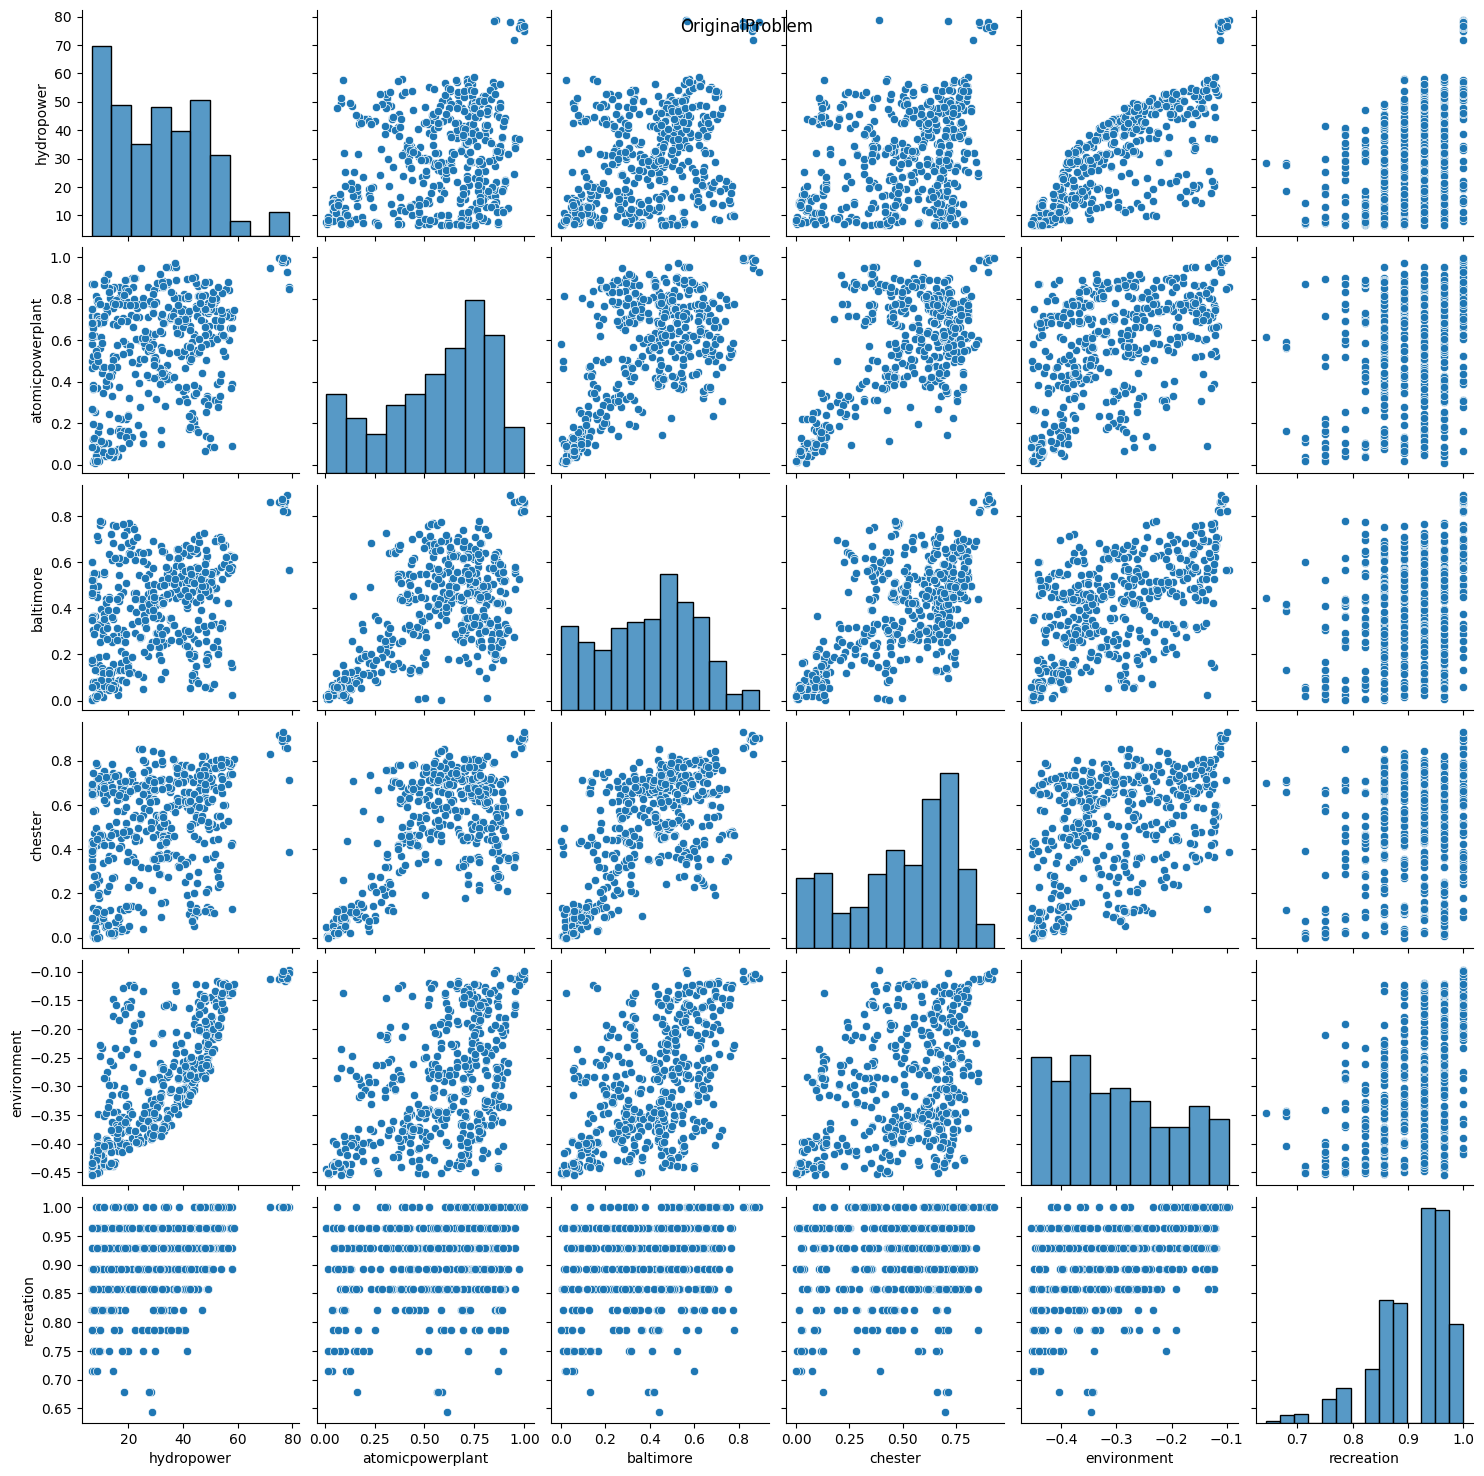

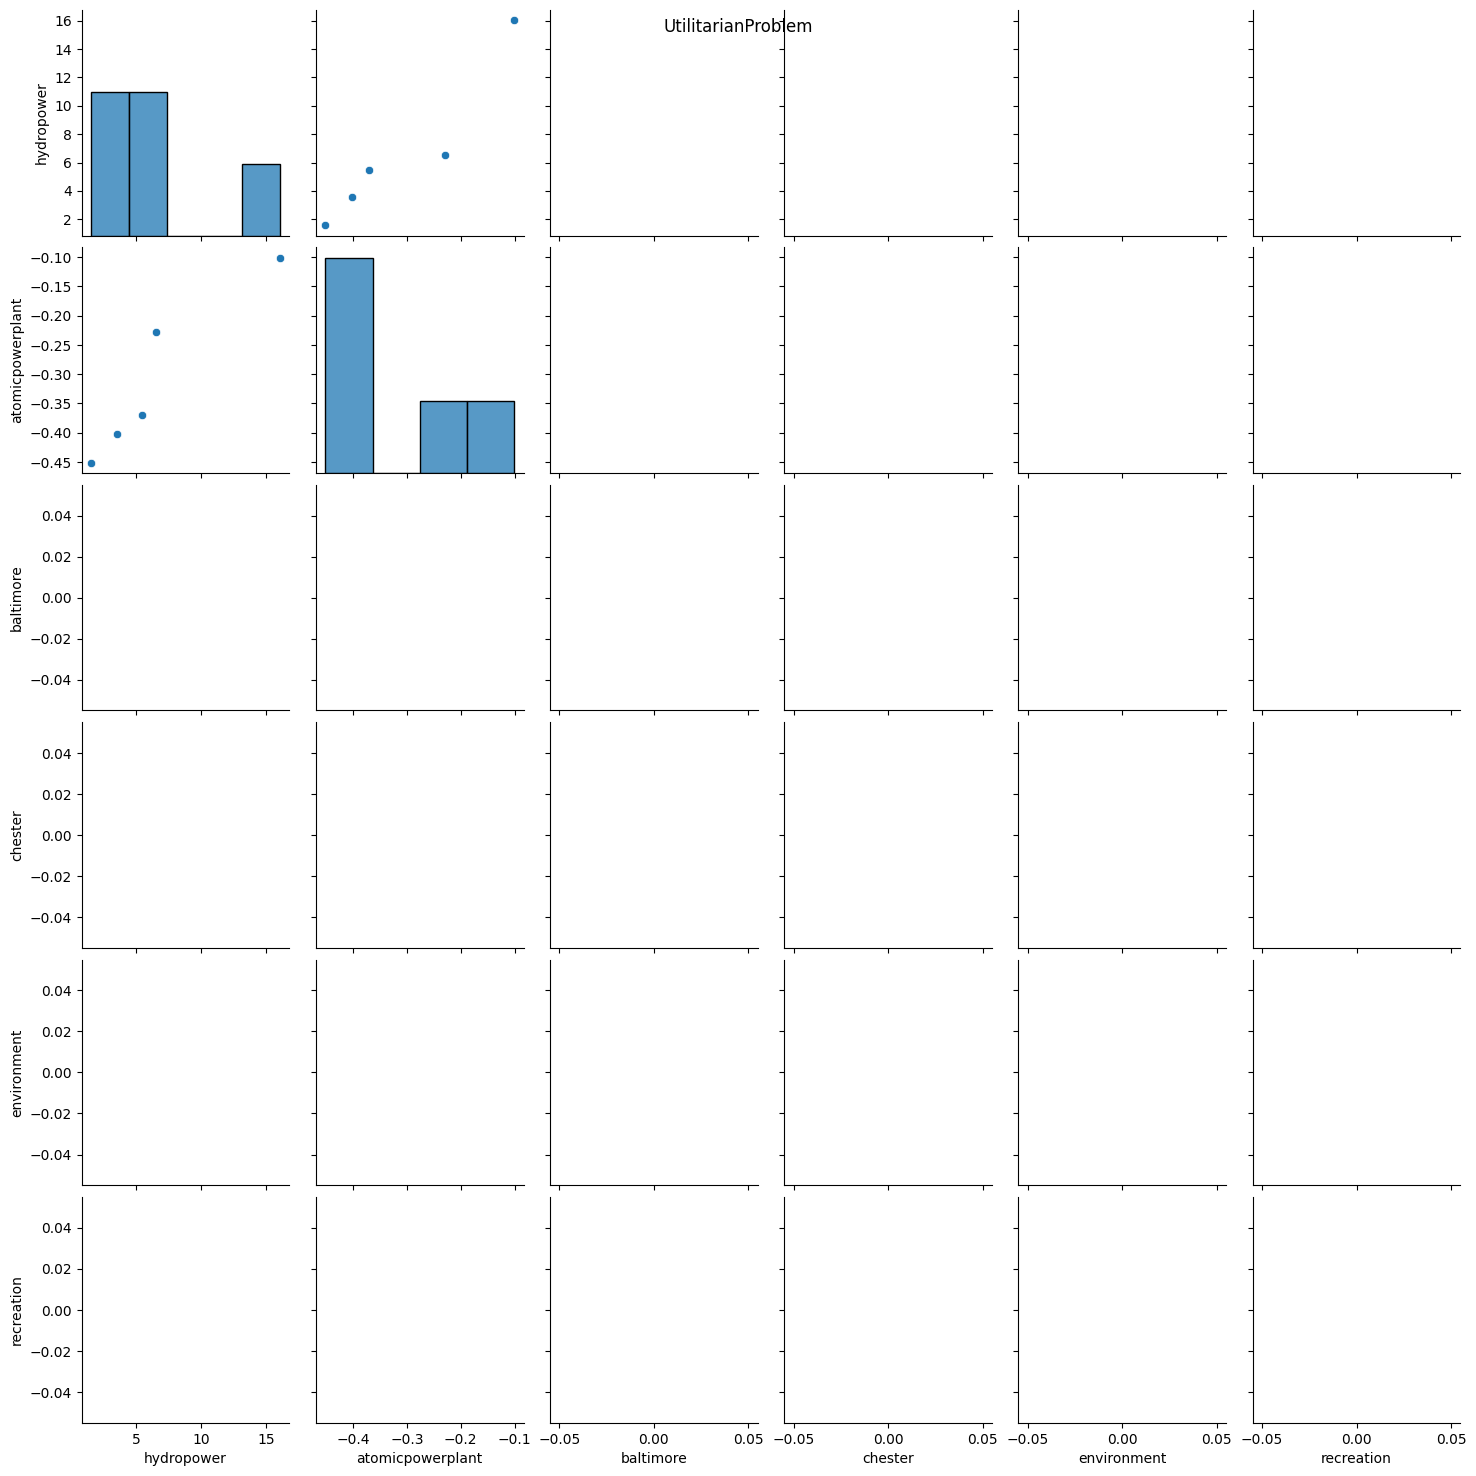

In [10]:
for i in pareto_sets:
    g = sns.pairplot(pareto_sets[i])
    g.fig.suptitle(i)
    plt.show()

## Some pairplots

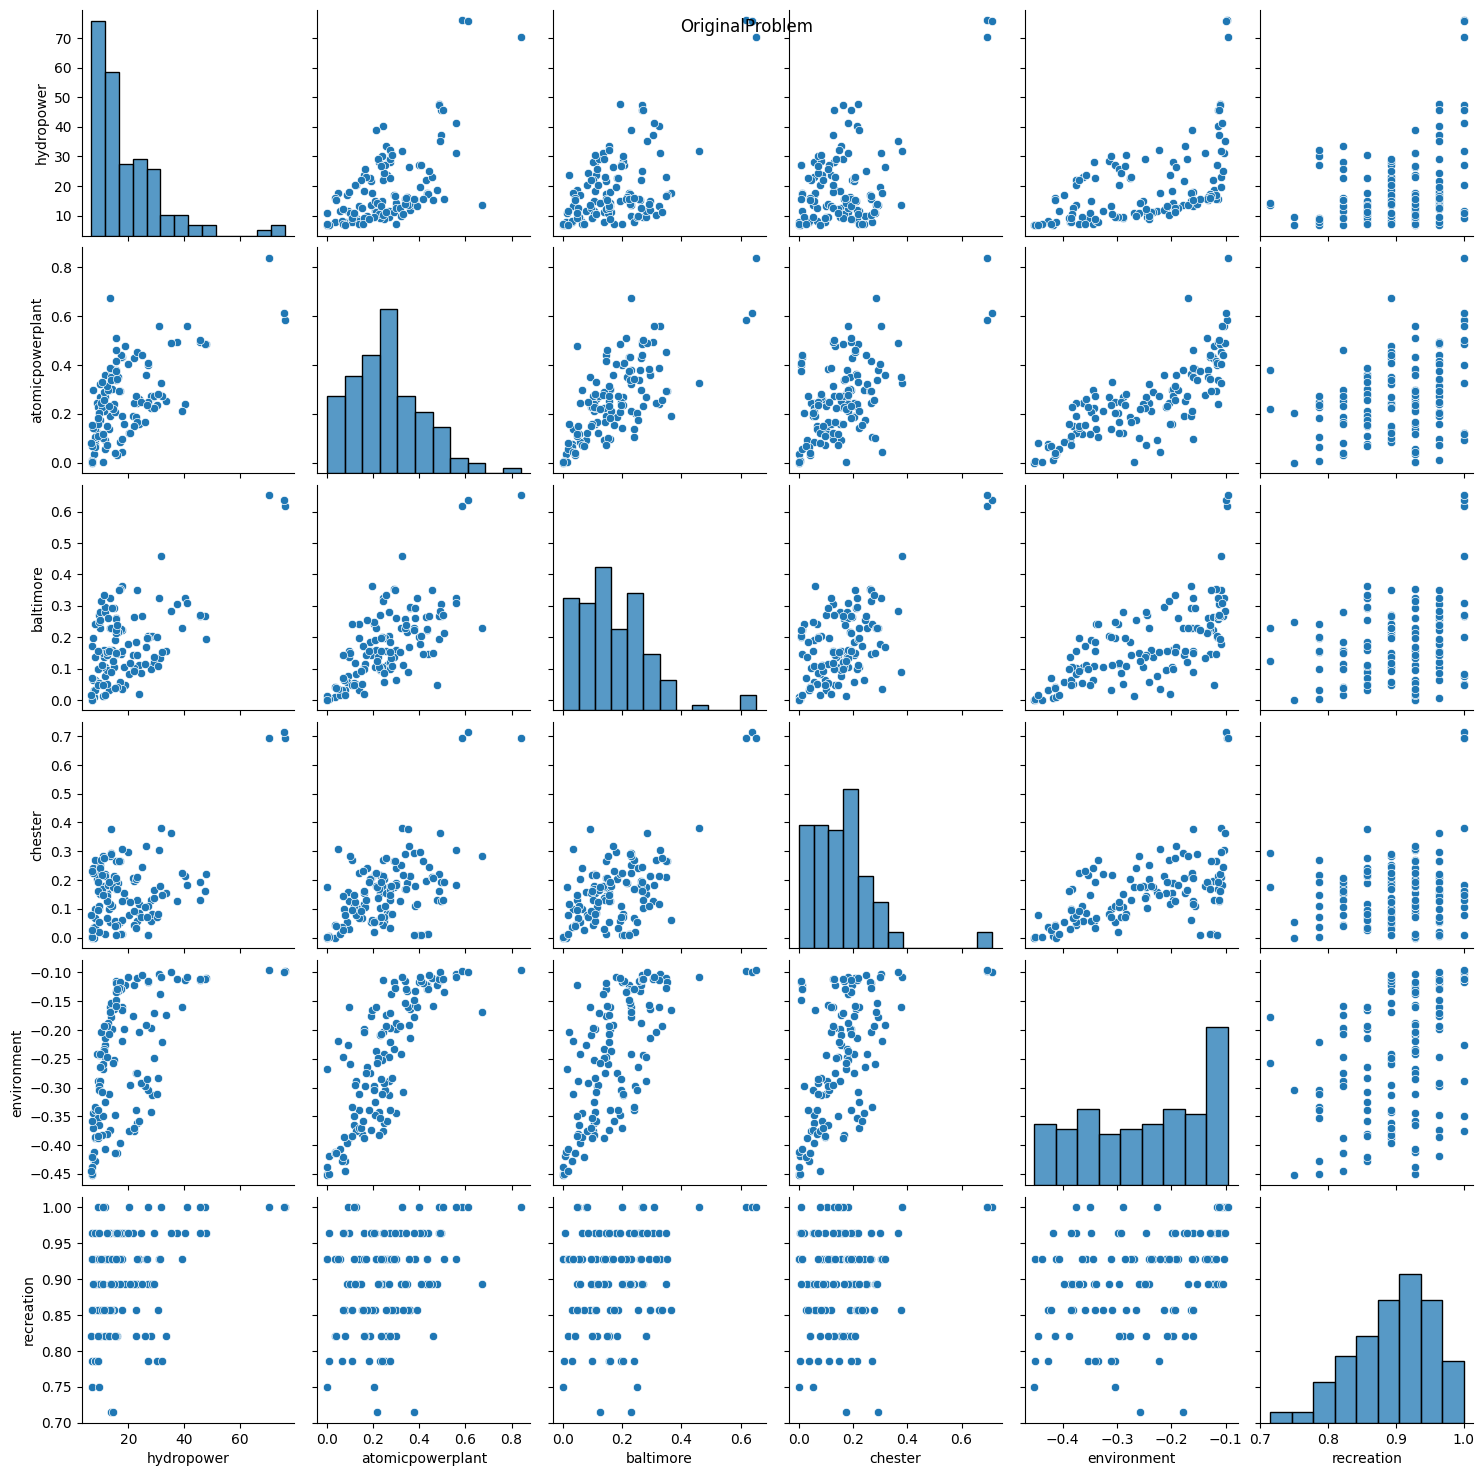

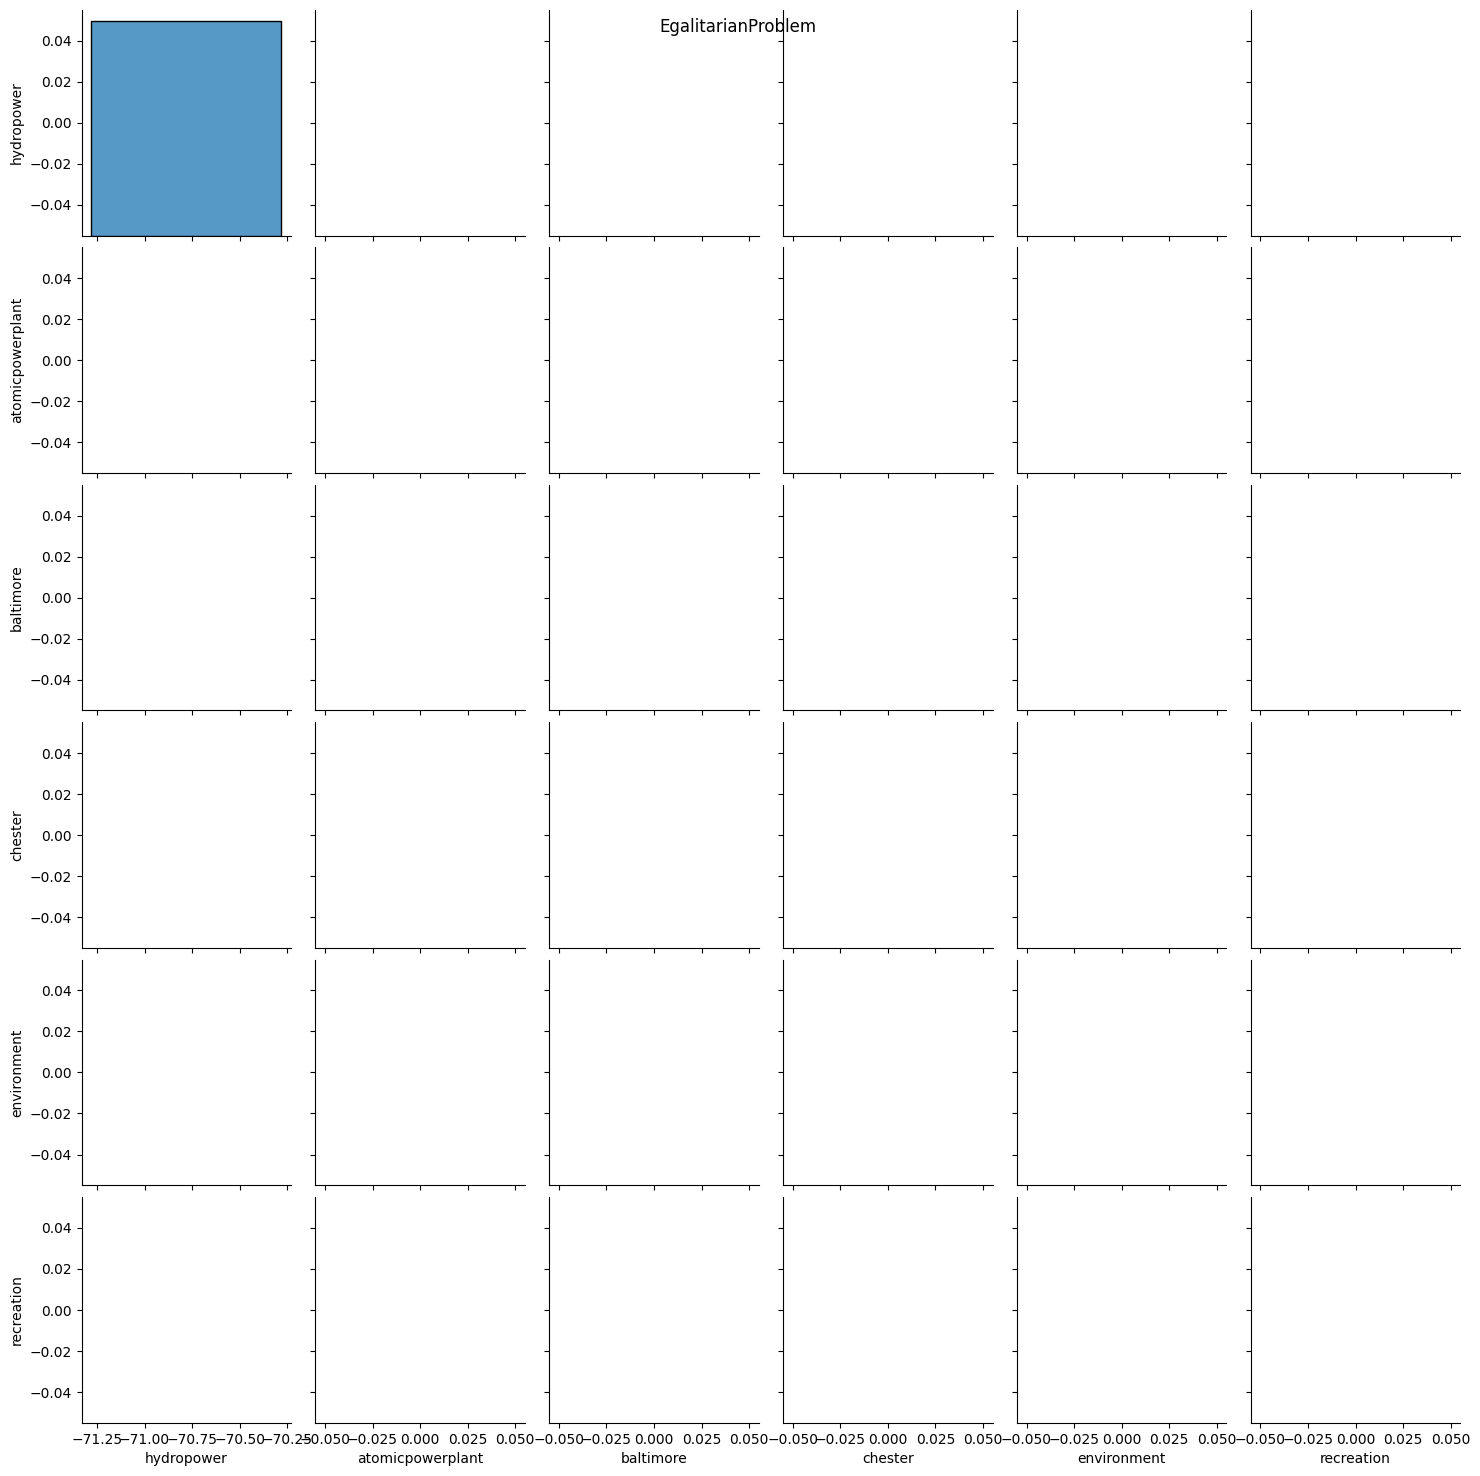

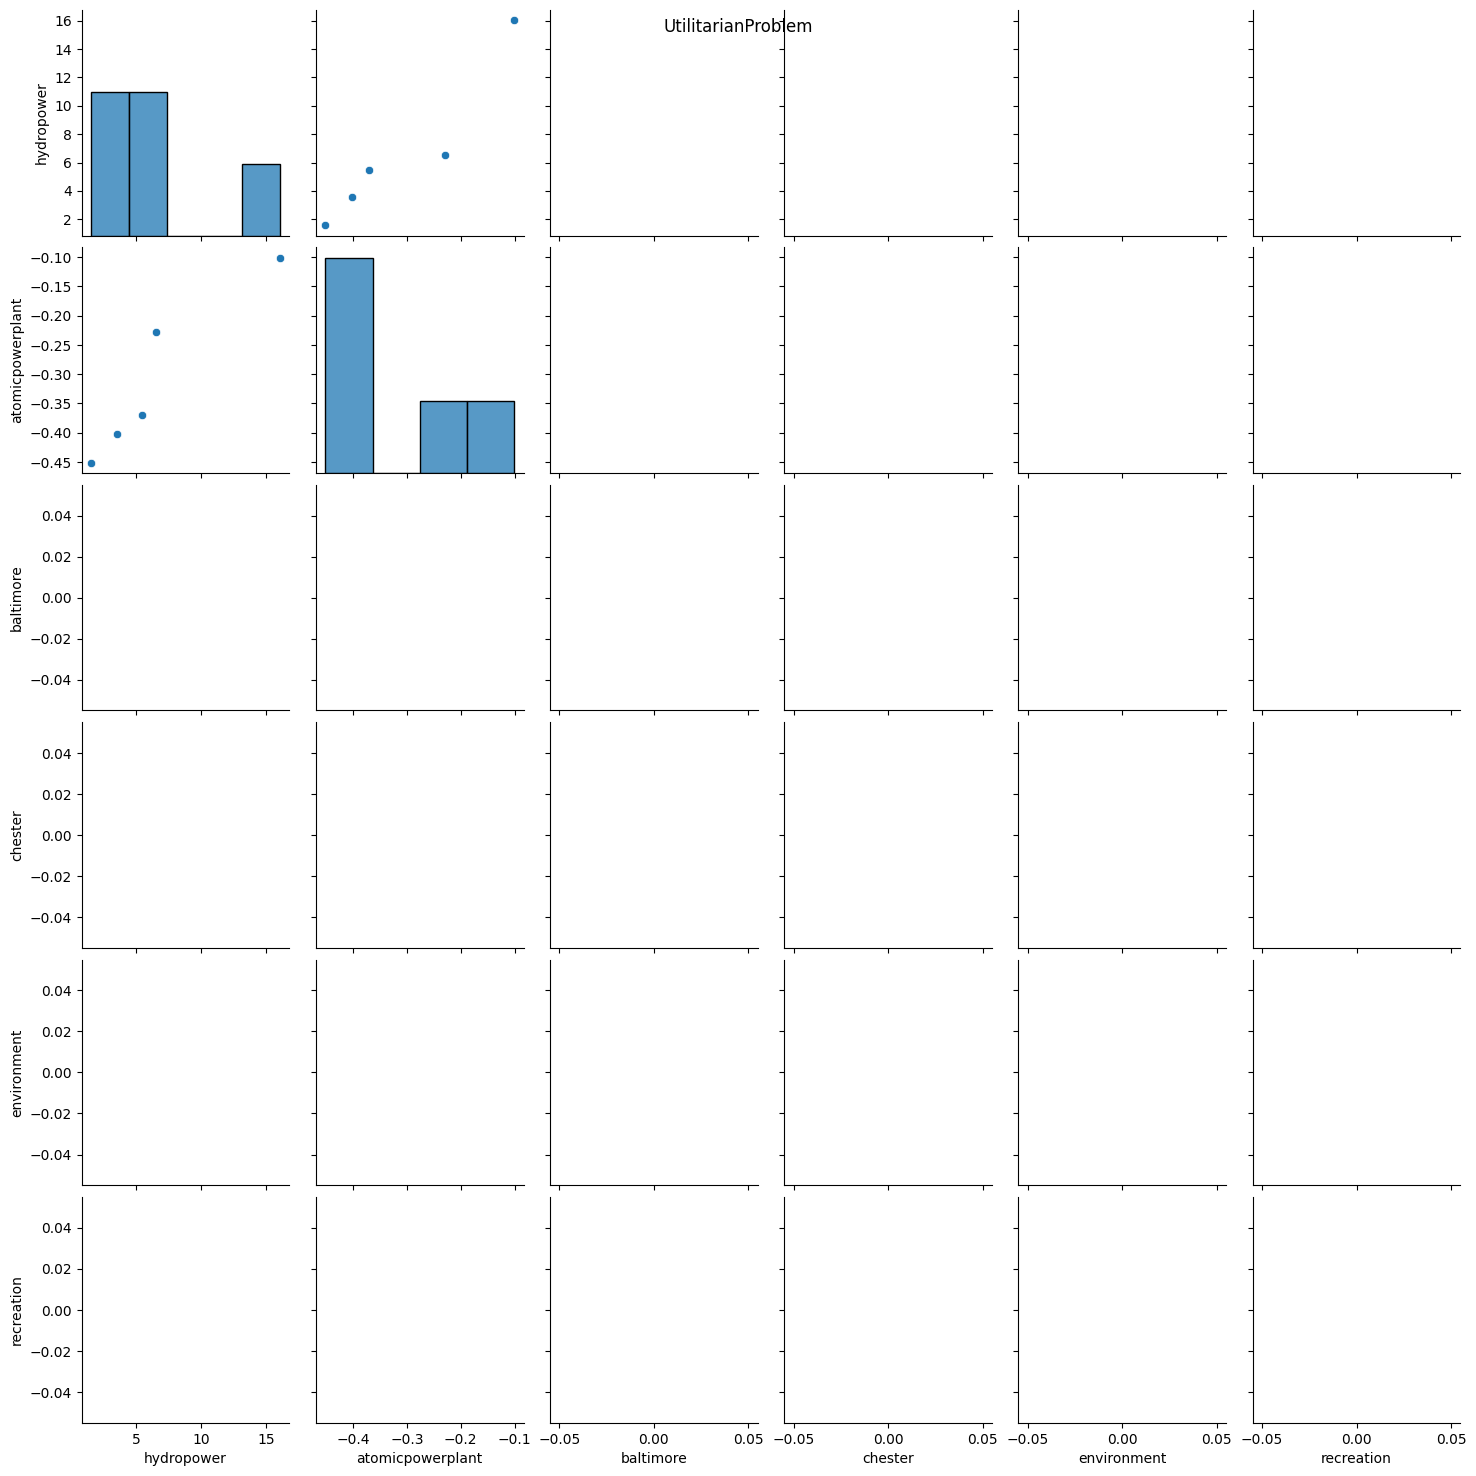

In [128]:
for i in pareto_sets:
    g = sns.pairplot(pareto_sets[i])
    g.fig.suptitle(i)
    plt.show()

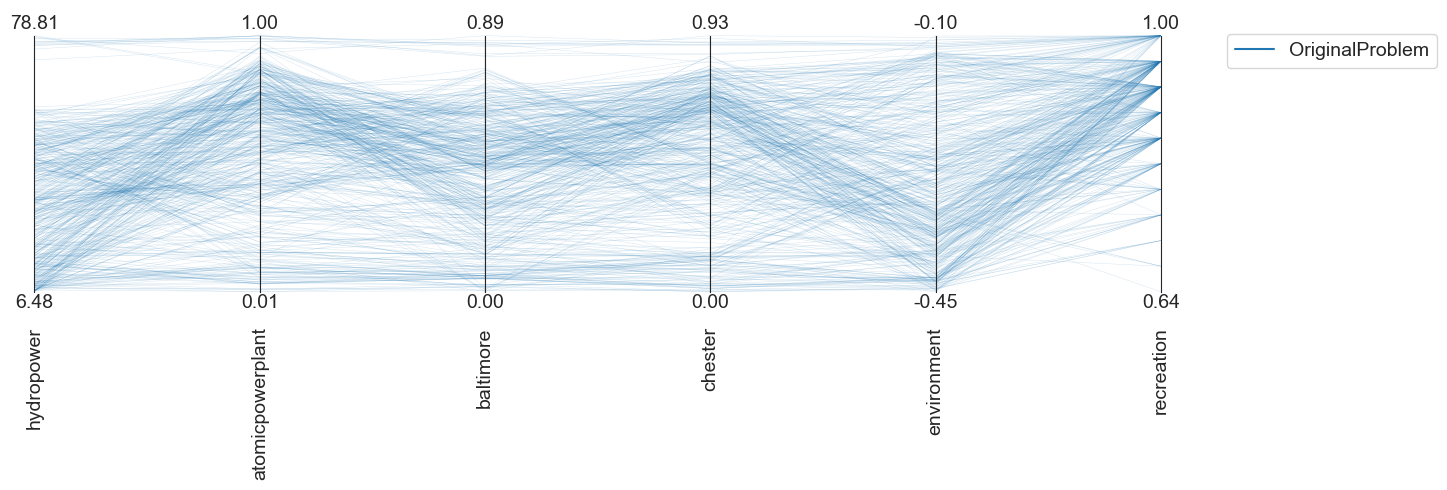

In [24]:
limits = get_limits(pd.concat(pareto_sets.values()))
# limits.loc[0] = [0,0,0,0,0,0]
# limits.loc[1] = [82,1,1,1,1,1]
axes = ParallelAxes(limits)

sns.color_palette()

for (k,v), c in zip(pareto_sets.items(), sns.color_palette()):
    axes.plot(v, label=k, lw=0.3, color=c, alpha=0.2)

axes.legend()

In [25]:
limits = get_limits(pd.concat(pareto_sets.values()))
# limits.loc[0] = [0,0,0,0,0,0]
# limits.loc[1] = [82,1,1,1,1,1]

for (k,v), c in zip(pareto_sets.items(), sns.color_palette()):
    axes = ParallelAxes(limits, rot=0)    
    axes.plot(v, label=k, lw=1, color=c, alpha=0.2)
#     axes.legend()
#     plt.savefig(f'./figs/{k}/{k}_parcoords_compare.png')
#     plt.savefig(f'./figs/{k}/{k}_parcoords_compare.pdf')

plt.show()

## Add ethical formulation as entry to the dataframe

In [4]:
# I am happy I learn this

for i,j in pareto_sets.items():
    j['problem'] = i
combined = pd.concat(pareto_sets.values())
combined

,hydropower,atomicpowerplant,baltimore,chester,environment,recreation,problem
0,16.158891,0.043524,0.048505,0.056072,-0.395459,0.964286,OriginalProblem
1,7.002870,0.009940,0.005379,0.005984,-0.444481,0.964286,OriginalProblem
2,8.249738,0.108319,0.019186,0.076959,-0.442806,0.714286,OriginalProblem
3,16.373479,0.169113,0.088913,0.084437,-0.406172,0.785714,OriginalProblem
4,16.212000,0.075909,0.026103,0.028455,-0.413059,0.857143,OriginalProblem
...,...,...,...,...,...,...,...
485,52.916209,0.855340,0.203515,0.444970,-0.192446,0.964286,OriginalProblem
486,6.679929,0.622637,0.468273,0.693275,-0.434239,0.928571,OriginalProblem
487,8.510516,0.526253,0.714067,0.447736,-0.385713,0.928571,OriginalProblem
488,42.928991,0.509180,0.549149,0.773976,-0.248464,0.892857,OriginalProblem


## Boxplot analysis

In [ ]:
l=[]
for n in ethical_formulations:
    l.append(n.__name__)


for entry in combined.columns[0:-1]:
    data = combined[[entry, 'problem']]
    data
    sns.boxplot(data=data, y=entry,x='problem', order=l, palette = "colorblind")
    plt.ylabel(f"{entry} objective")
    plt.xticks(rotation=35)
    plt.show()

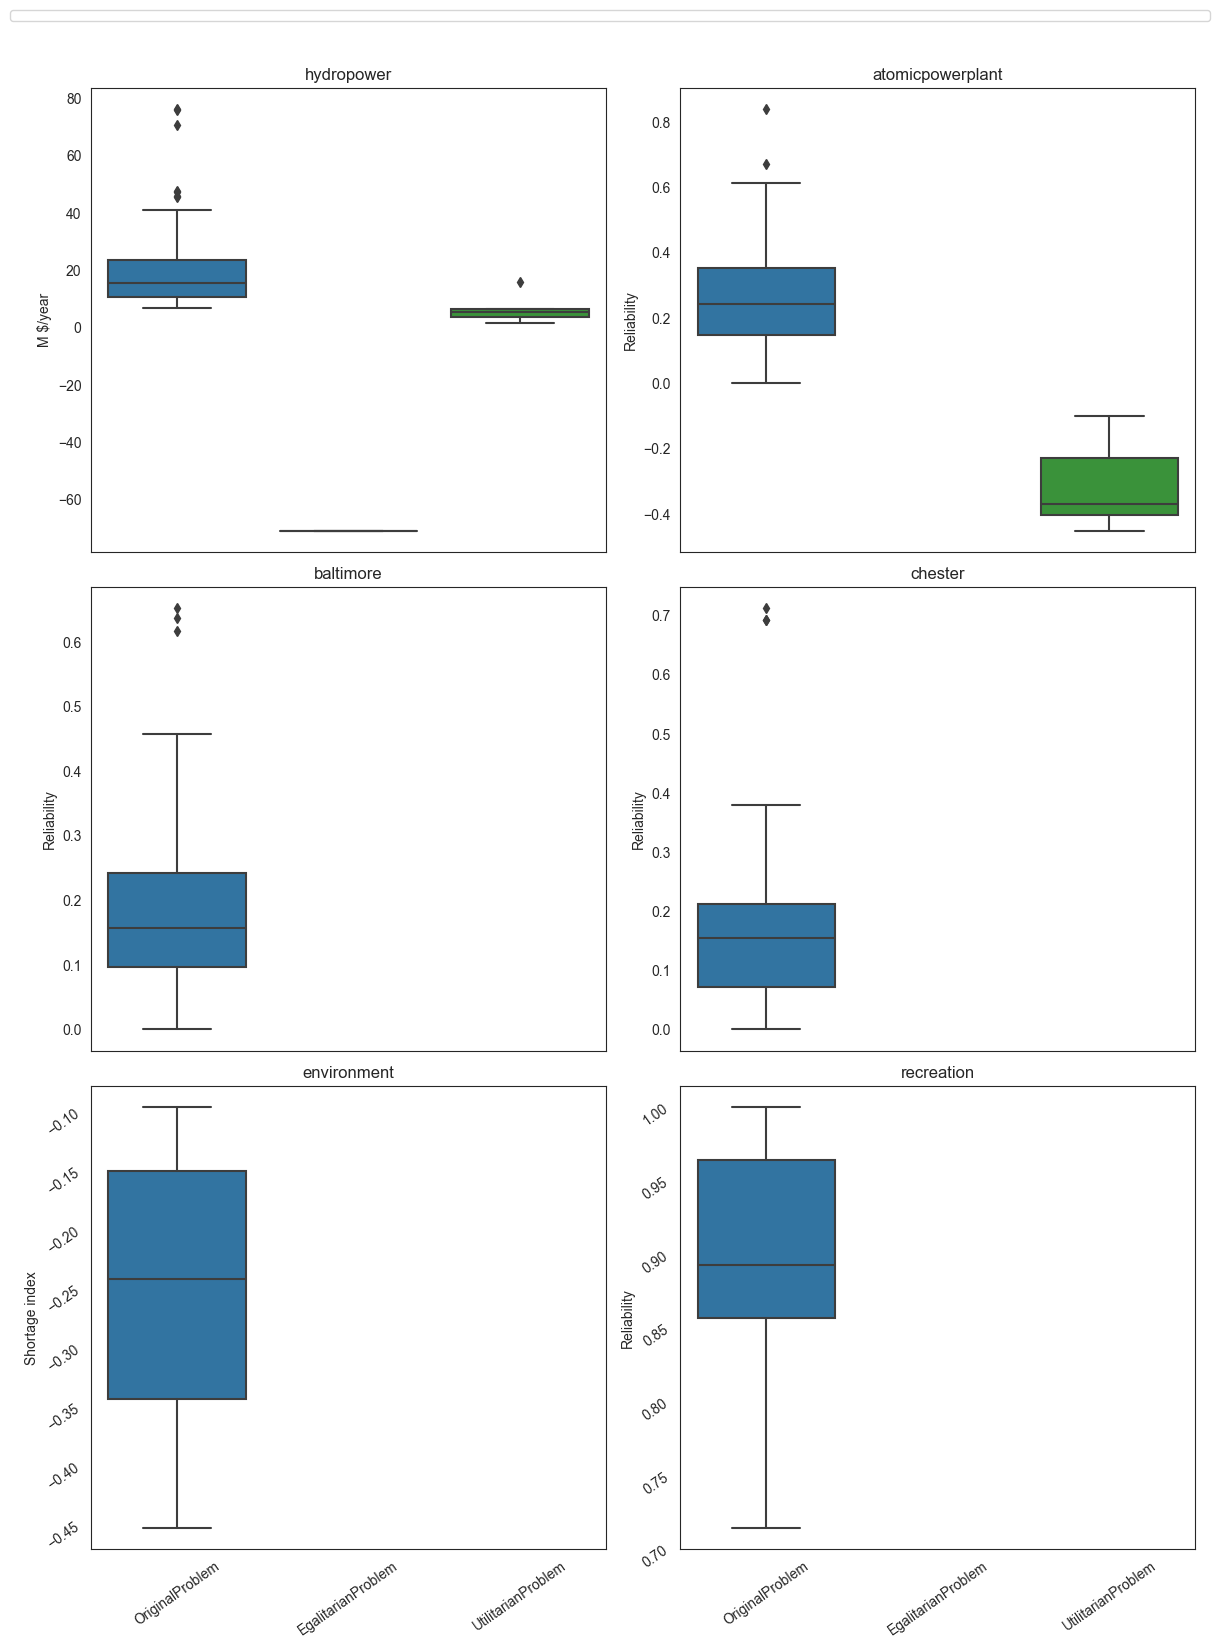

In [156]:
import matplotlib.patches as mpatches
fig, axes = plt.subplots(3, 2, sharex=True, figsize=(12,16))

for i, entry in enumerate(combined.columns[0:-1]):
    x = i/2
    data = combined[[entry, 'problem']]
    if i%2:
        sns.boxplot(ax=axes[int(x),1], data=data, y=entry, x='problem', order=l)
        axes[int(x),1].set_title(entry)
        axes[int(x),1].set_ylabel("Reliability")
        axes[int(x),1].set_xlabel(None)
    else:
        sns.boxplot(ax=axes[int(x),0], data=data, y=entry, x='problem', order=l)
        axes[int(x),0].set_title(entry)
        axes[int(x),0].set_xlabel(None)
        if x == 0:
            axes[int(x),0].set_ylabel("M $/year")
        elif x == 2:
            axes[int(x),0].set_ylabel("Shortage index")
        else:
            axes[int(x),0].set_ylabel("Reliability")
    axes[2,0].tick_params(labelrotation=35)
    axes[2,1].tick_params(labelrotation=35)

# make a single figure level legend
handles = []
colors = sns.color_palette()

# for (i, problem) in enumerate(ethical_formulations):
#     # dirty hack to remove underscore from name of rbf
#     name = ' '.join(ethical_formulations.__name__.split('_')[0:-1])
#     patch = mpatches.Patch(color=colors[i], label=name)
#     handles.append(patch)

fig.legend(handles=handles, ncol=4, bbox_to_anchor=(0, 1.02, 1, 0.2), loc="lower left",
                mode="expand", borderaxespad=0, )        
fig.tight_layout()
# plt.savefig(f'./figs/box_plots_compare.png', bbox_inches = 'tight')
# plt.savefig(f'./figs/box_plots_compare.pdf', bbox_inches = 'tight')

In [ ]:
fig, ax = plt.subplots(3, 2, sharex=True, figsize=(12,16))

x=0
for i, entry in enumerate(combined.columns[0:-1]):
    x = i/2
    data = combined[[entry, 'rbf']]
    if i%2:
        sns.boxplot(ax=ax[int(x),1], data=data, y=entry, x='rbf', order=l)
        ax[int(x),1].set_title(entry)
        ax[int(x),1].set_ylabel("Reliability")
        ax[int(x),1].set_xlabel(None)
    else:
        sns.boxplot(ax=ax[int(x),0], data=data, y=entry, x='rbf', order=l)
        ax[int(x),0].set_title(entry)
        ax[int(x),0].set_xlabel(None)
        if x == 0:
            ax[int(x),0].set_ylabel("M $/year")
        elif x == 2:
            ax[int(x),0].set_ylabel("Shortage index")
        else:
            ax[int(x),0].set_ylabel("Reliability")
    ax[2,0].tick_params(labelrotation=35)
    ax[2,1].tick_params(labelrotation=35)
fig.tight_layout()

## Epsilon progress, Hypervolume

In [5]:
nfearchive = {}
for n in ethical_formulations:
    nfearchive[n.__name__] = {}
for entry in ethical_formulations:
    name = entry.__name__
    output_dir = f"../{output}/{name}/"
    for i in os.listdir(output_dir):
        if i.endswith("_hypervolume.csv"):
#             nfearchive[name][i.split("_")[0]] = pd.read_csv(output_dir + i)
            archives_by_nfe = pd.read_csv(output_dir + i)
            nfes = archives_by_nfe["Unnamed: 0"].values
            u_nfes = np.unique(nfes)
#             selected_nfe = u_nfes[-1::]
            selected_nfe = u_nfes[0::10]
            selected_nfe = np.append(selected_nfe, u_nfes[-1::])
            nfearchive[name][int(i.split("_")[0])] = archives_by_nfe.loc[archives_by_nfe['Unnamed: 0'].isin(selected_nfe)]

In [207]:
test_3 = pd.DataFrame.from_dict(nfearchive,
                               orient='index')
test_3 = test_3.reset_index()

,Unnamed: 0,Unnamed: 1,0,1,2,3,4,5
0,100,0,9.541028,0.062257,0.001010,0.019680,-0.374813,0.857143
1,100,1,49.444486,0.364413,0.361492,0.402265,-0.091692,1.000000
2,100,2,13.867751,0.199380,0.091056,0.124541,-0.237102,0.821429
3,100,3,19.690831,0.317562,0.214591,0.175681,-0.106941,0.964286
4,100,4,24.317286,0.359883,0.405348,0.322423,-0.094896,0.928571
...,...,...,...,...,...,...,...,...
918,1000,132,8.763053,0.049725,0.107846,0.105426,-0.383505,0.892857
919,1000,133,9.471600,0.232634,0.095006,0.144073,-0.388384,0.928571
920,1000,134,26.664369,0.376931,0.243154,0.317239,-0.111500,0.928571
921,1000,135,15.867950,0.133250,0.079960,0.059859,-0.332857,0.857143


## Figuring out what this means

In [208]:
test_3.loc[0][70]



,Unnamed: 0,Unnamed: 1,0,1,2,3,4,5
0,100,0,9.541028,0.062257,0.001010,0.019680,-0.374813,0.857143
1,100,1,49.444486,0.364413,0.361492,0.402265,-0.091692,1.000000
2,100,2,13.867751,0.199380,0.091056,0.124541,-0.237102,0.821429
3,100,3,19.690831,0.317562,0.214591,0.175681,-0.106941,0.964286
4,100,4,24.317286,0.359883,0.405348,0.322423,-0.094896,0.928571
...,...,...,...,...,...,...,...,...
918,1000,132,8.763053,0.049725,0.107846,0.105426,-0.383505,0.892857
919,1000,133,9.471600,0.232634,0.095006,0.144073,-0.388384,0.928571
920,1000,134,26.664369,0.376931,0.243154,0.317239,-0.111500,0.928571
921,1000,135,15.867950,0.133250,0.079960,0.059859,-0.332857,0.857143


## Unnamed: 0 is nfe
## Unnamed: 1 amount of runs?
## 0,1,2,3,4,5: ?

## What do you plot?

In [213]:
# problem = 'OriginalProblem'
# tempnfe = {}
# temphv = {}
# nfe_sets = {}
# hv_sets = {}
# # for problem in archives:
# nfe_sets[problem] = {}
# hv_sets[problem] = {}
# hv = Hypervolume(reference_set=pareto_sets[problem])

# # hv = Hypervolume(reference_set=ref_set) #global

# print(f"started {problem} at {DT.datetime.now().strftime('%H:%M:%S')}")

# # seedl = [10, 20, 30]
# for seed in archives[problem]:
#     nfe_sets[problem][seed] = {}
#     hv_sets[problem][seed] = {}
#     s_archives = archives[problem][seed]
#     nfes = []
#     hvs = []
#     for nfe, archive in s_archives.items():
#         nfes.append(nfe)
#         hvs.append(hv.calculate(archive))
#     nfe_sets[problem][seed] = nfes
#     hv_sets[problem][seed] = hvs
#     tempnfe[seed] = nfes
#     temphv[seed] = hvs
#     dfhv = pd.DataFrame.from_dict(temphv, orient='index')
#     dfnfe = pd.DataFrame.from_dict(tempnfe, orient='index')
#     dfhv = dfhv.T
#     dfnfe = dfnfe.T
# #     dfhv.to_csv(f"hv/{rbf}_hv.csv", index=False)
# #     dfnfe.to_csv(f"hv/{rbf}_nfe.csv", index=False)
# #     dfhv.to_csv(f"hv_global/{rbf}_hv_all.csv", index=False) #global
# #     dfnfe.to_csv(f"hv_global/{rbf}_nfe_all.csv", index=False) #global
#     print(f"finished seed: {seed} at {DT.datetime.now().strftime('%H:%M:%S')}")

In [214]:

# fig, ax = plt.subplots(sharex=True)
# for i in nfe_sets_all:
#     ax.plot(nfe_sets_all[i], hv_sets_all[i])

# ax.set_xlabel('nfe')
# ax.set_ylabel('hypervolume')
# ax.set_title(rbf)
# sns.despine()

# plt.show()

In [ ]:
pop_size_list = [100, 200, 400, 800, 1000]
 
fig_rand_seed = plt.figure(figsize=(10,7))
ax_rand_seed = fig_rand_seed.add_subplot()
 
for p in range(len(pop_size_list)):
    fisheries_game_problem_setup(nVars, nObjs, nCnstr, pop_size_list[p])
    algorithm = fisheries_game_problem_setup(nVars, nObjs, nCnstr, pop_size=int(init_pop_size))
    algorithm.run(int(init_nfe))
     
    plot_hvol(algorithm, maxevals, frequency, objs_lower_bounds, objs_upper_bounds, 
              ax_rand_seed, pop_size_list[p])
 
plt.title('PyBorg Random Seed Analysis')
plt.xlabel('Number of Function Evaluations')
plt.ylabel('Hypervolume')
plt.legend()
plt.show()

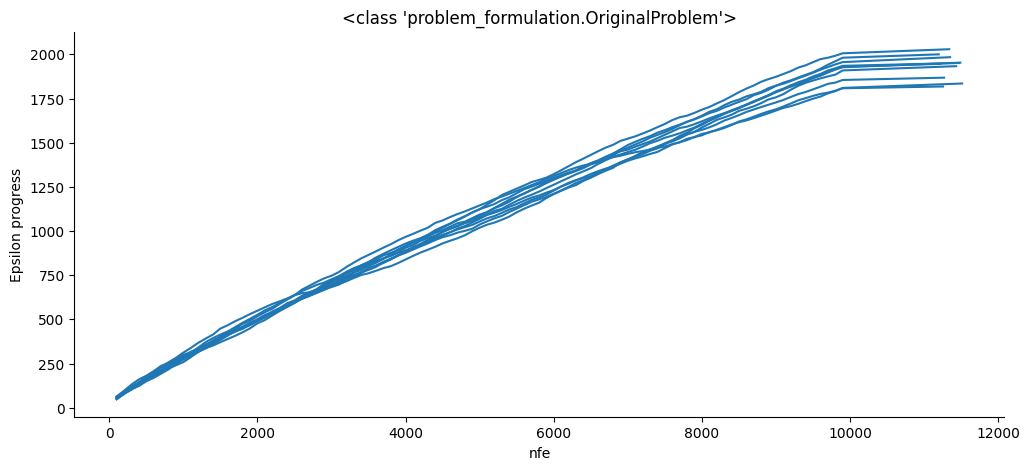

In [12]:
for entry, c in zip(ethical_formulations, sns.color_palette()):
    ethical_formulations = entry.__name__
    
    ep_nfe = {}
    ep_improv = {}
    output_dir = f"../{output}/{ethical_formulations}/"
    for i in os.listdir(output_dir):
        if i.endswith("_convergence.csv"):
            ep_load = pd.read_csv(output_dir + i)
            ep_nfe[int(i.split("_")[0])] = ep_load.nfe
            ep_improv[int(i.split("_")[0])]  = ep_load.improvements
    ep_nfe = pd.DataFrame.from_dict(ep_nfe)
    ep_improv = pd.DataFrame.from_dict(ep_improv)
    
    
    fig, ax = plt.subplots(sharex=True)
    ax.plot(ep_nfe, ep_improv, color=c)

    ax.set_xlabel('nfe')
    ax.set_ylabel('Epsilon progress')
    ax.set_title(problem)
    sns.despine()
#     plt.savefig(f'figs/{rbf}/{rbf}_epsprog.jpg')
plt.show()

## Irrelevant, only in case you want to inspect releases

In [246]:
# pareto_sets = {}
# for entry in rbfs:
#     name = entry.__name__
#     output_dir = f"../refsets/"
#     results = pd.read_csv(output_dir + name+ '_refset.csv')
#     pareto_sets[name] = results

refset = {}
varset = {}

for entry in ethical_formulations:
    name = entry.__name__
    # load variables
    output_dir = os.path.abspath(f'../{output}/{name}/')
    for filename in os.listdir(output_dir):
        if filename.endswith('_variables.csv'):
            df_vars = pd.read_csv(f"{output_dir}/{filename}",header=None)
            columnname = ["c1","r1","c2","r2","c3","r3","c4","r4","c5","r5","c6","r6","c7","r7","c8","r8","w1","w2","w3","w4","w5","w6","w7","w8","w9","w10","w11","w12","w13","w14","w15","w16"]
            df_vars.columns = columnname
# #         elif filename == f'{name}_.csv':
# #             df_refs = pd.read_csv(f"{output_dir}/{filename}")
# #             refset[name] = df_refs
        else:
            continue
        varset[name] = df_vars

{'OriginalProblem':           c1        r1        c2        r2        c3        r3        c4  \
 0  -0.017878  0.459478  0.073546  0.343344 -0.655615  0.419929 -0.489069   
 1  -0.870448  0.683982 -0.563583  0.868781 -0.656450  0.636522 -0.932068   
 2   0.765889  0.485998 -0.915303  0.464607 -0.994645  0.204872  0.026854   
 3  -0.386230  0.670090  0.017403  0.291723 -0.731535  0.971336 -0.172154   
 4  -0.910365  0.351799 -0.079021  0.183675 -0.024034  0.264009  0.110393   
 ..       ...       ...       ...       ...       ...       ...       ...   
 91 -0.910365  0.355543 -0.079021  0.182150 -0.024034  0.198296  0.110393   
 92 -0.336628  0.163291 -0.883684  0.906009 -0.109477  0.323152 -0.603419   
 93  0.765396  0.684642 -0.872509  0.269610  0.214650  0.221698 -0.525563   
 94  0.768279  0.502752 -0.872509  0.278568  0.223803  0.211916  0.989960   
 95 -0.561321  0.116393 -0.221138  0.025001 -0.196965  0.268562  0.964881   
 
           r4        c5        r5  ...        w7       

In [232]:
## combined graph if you want

## Evaluation metrics as defined in the thesis report

Our final choice should focus on how we define justice. We explain this through the unsatisfaction of
justice. When we cannot ensure a consistent minimum quality and quantity, justice is not served to users
(Osman & Faust, 2021). Rival-framings are therefore between R1, R2, R3, R4, SNR, Mean, Covariance.
Therefore this thesis will have a comparative design focused at the rival framings of equity, and
efficiency, the two most important trade-offs for intragenerational distributive justice (Jafino et al., 2021).
These dimensions, and the dimension of sustainability is defined by Lévite and Sally (2002), shown in
Fig. 4.1. We are not only exploring equity, we are bringing justice to the decision-making process.

• R1: Deviation from the baseline state of the world (Kasprzyk, Nataraj, Reed, & Lempert, 2013),
which penalizes incorrect assumptions (about the future state of the world).

• R2: Deviation from the ’best’ solution in each world. In our case, there is only one ’best’ solution,
since we are optimizing over one scenario. Alternatively, as per Herman et al. (2015) regret
is defined by " the difference between a solution’s performance and that of the best solution in the
prevailing state of the world". Here, penalization is attributed to making the wrong choice (Savage,
1951). Moreover, it could be seen as a measure to ensure awareness on the consequences of
decision-making.

• R3: maximin


In [25]:
# original problem formulation with some seeds 
df = test_2

## R1

# this shoulld be later adapted to the mean of the reference set, or the reference set itself
base_state = df.mean(axis=0)

## R2
# pre-defined by the SBRC as ideal baseline
best_state = [60, 0.9, 0.85, 0.9, 0.1, 0, 0]

df = df.reset_index()  # make sure indexes pair with number of rows

deviation_best_state = (df - best_state)/best_state
deviation_base_state = (df - base_state)/base_state

# for column in df:
#     i = 0
#     deviation[column] = df[column] - best_state[i]

#     print(column)
    
# for index, row in df.iterrows():
#     print(row[''], row['c2'])

# values = df

# df_r1 = pd.DataFrame(columns = )
deviation_best_state

index        OriginalProblem                               \
         hydropower reliability atomicpowerplant reliability   
0  -60.0              26.319278                    -0.309066   
1  -59.0              11.767353                    -0.819320   
2  -58.0               5.945908                    -0.848682   
3  -57.0              26.302086                    -0.699736   
4  -56.0               9.789504                    -0.771763   
5  -55.0              15.800327                    -0.728178   
6  -54.0              61.601112                    -0.306772   
7  -53.0              45.977992                    -0.619260   
8  -52.0              39.602553                    -0.637521   
9  -51.0               7.082337                    -0.767392   
10 -50.0              16.696667                    -0.417073   
11 -49.0               5.995473                    -0.849998   
12 -48.0               8.644105                    -0.618832   
13 -47.0               8.865871                    -0.779786   
14 -46.0              16.379314                    -0.642935   
15 -45.0               8.066525                    -0.602171   
16 -44.0              20.130016                    -0.761363   
17 -43.0              22.221730                    -0.604156   
18 -42.0               6.154834                    -0.832388   
19 -41.0              17.466305                    -0.700793   
20 -40.0               8.095094                    -0.805563   
21 -39.0              36.460779                    -0.415864   
22 -38.0              35.033280                    -0.323049   
23 -37.0              16.968775                    -0.753883   
24 -36.0              35.951230                    -0.522060   
25 -35.0              17.219810                    -0.509499   
26 -34.0              51.504658                    -0.433317   
27 -33.0               6.789208                    -0.774057   
28 -32.0              12.214661                    -0.551945   
29 -31.0              42.727619                    -0.710611   
30 -30.0               5.931474                    -0.840662   
31 -29.0              19.619356                    -0.732386   
32 -28.0               6.929530                    -0.816419   
33 -27.0              39.299614                    -0.571222   
34 -26.0               6.486643                    -0.780742   
35 -25.0              43.256812                    -0.254512   
36 -24.0               7.312280                    -0.826548   
37 -23.0              26.144606                    -0.742587   

                                                                      \
   baltimore reliability chester reliability environment reliability   
0              -0.705103            0.029204               -0.100291   
1              -0.867290           -0.069437               -0.363806   
2              -0.899553           -0.099375               -0.450686   
3              -0.785236           -0.038970               -0.099673   
4              -0.833563           -0.046710               -0.240579   
5              -0.836316           -0.016168               -0.372059   
6              -0.530815            0.266517               -0.084339   
7              -0.598141            0.206854               -0.085151   
8              -0.761924            0.062926               -0.098335   
9              -0.801497           -0.073379               -0.392767   
10             -0.676022           -0.088153               -0.122272   
11             -0.899999           -0.099998               -0.452053   
12             -0.628499            0.002609               -0.244241   
13             -0.806868            0.050502               -0.233368   
14             -0.683589            0.044449               -0.099523   
15             -0.841778            0.083805               -0.240783   
16             -0.817369            0.018832               -0.164865   
17             -0.795443           -0.043773               -0.362321   
18

I could define R3, the worst possible performance as the lowest sum of reliability for a certain policy under a scenario

I could define R4, the worst possible performance as the lowest sum of reliability for a certain policy under a scenario

Now I realise that SNR is a bad metric for comparison, since the distribution of every objective formulation is completely different. It is best to look at the Kendall-tau b distribution, just as Jafino et al. (2022) is doing.

In [ ]:
## Covariance

covariance = df.cov

## SNR (mean/std)

SNR = df.std(axis = 0) / df.mean(axis = 0)

# Yup, this is it. 